In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


# Visuvalization

<AxesSubplot:>

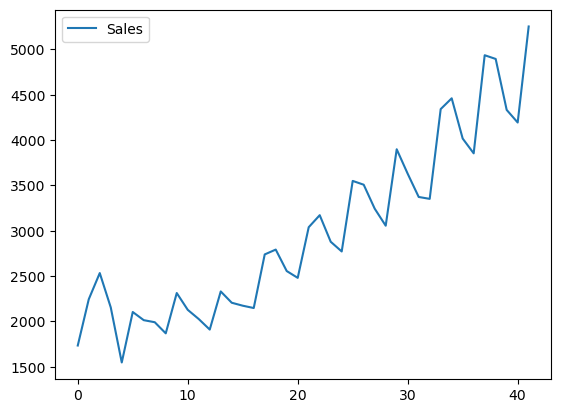

In [7]:
df.plot()

<AxesSubplot:>

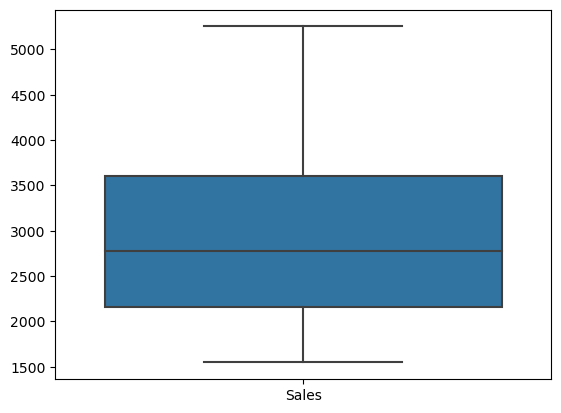

In [8]:
sns.boxplot(data=df)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

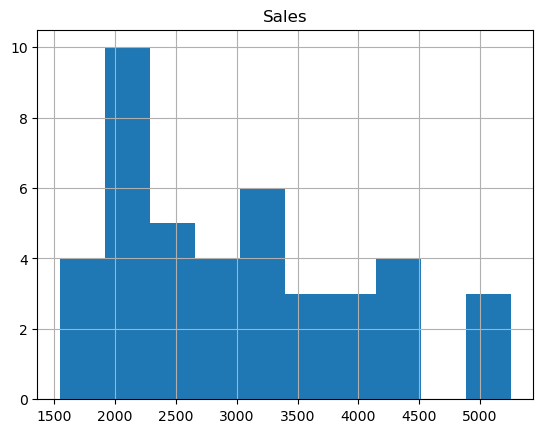

In [9]:
df.hist()

<AxesSubplot:ylabel='Density'>

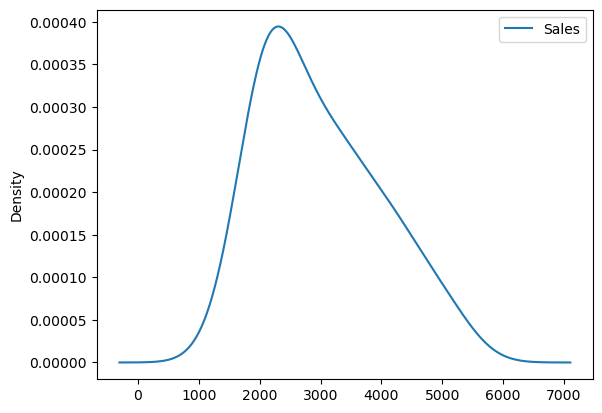

In [10]:
df.plot(kind='kde')

In [11]:
np.array(df['Sales'])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

D:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


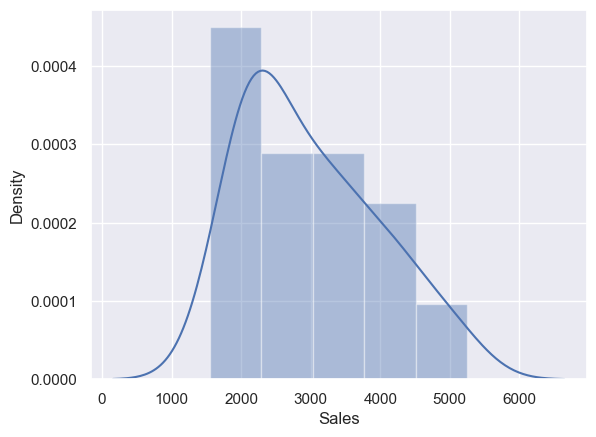

In [12]:
sns.set_theme()
rk=sns.distplot(df['Sales'],kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

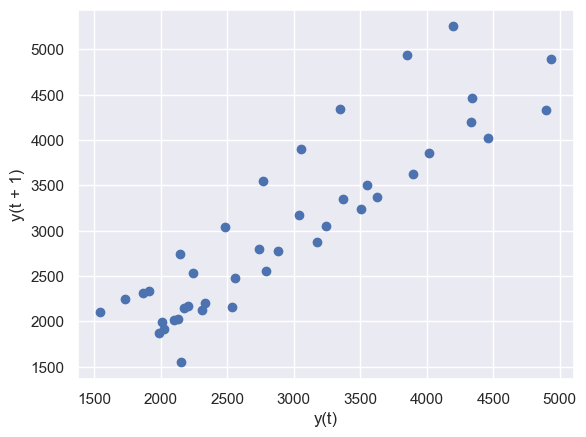

In [13]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])


# Data preprocessing

In [14]:
len(df)

42

In [15]:
df['quarter']=0
for i in range(42):
    p=df['Quarter'][i]
    df['quarter'][i]=p[0:2]

C:\Users\DELL\AppData\Local\Temp\ipykernel_2484\2476546037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][i]=p[0:2]


In [16]:
df

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [17]:
df['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [18]:
df_dummies=pd.DataFrame(pd.get_dummies(df['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([df,df_dummies],axis=1)

In [19]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [20]:
cc['t']=np.arange(1,43)
cc['t_squared']=cc['t']**2
cc['Sales_log']=np.log(df['Sales'])

In [28]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [29]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [30]:
train=cc.head(22)
test=cc.tail(8)

<AxesSubplot:>

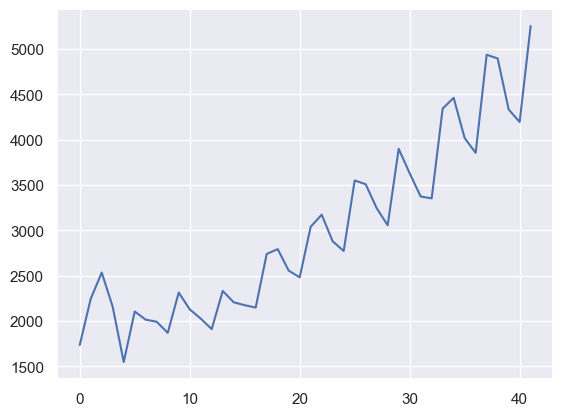

In [23]:
df['Sales'].plot()

# Models

In [24]:
from sklearn.metrics import mean_squared_error

In [31]:
linear_model=smf.ols('Sales~ t',data=train).fit()
linear_pred=pd.Series(linear_model.predict(test['t']))
linear_rmse=np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

1389.8580212439992

In [35]:
quad_model=smf.ols('Sales~t+t_squared',data=train).fit()
quad_pred=pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse=np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

1417.418133413047

In [36]:
exp_model=smf.ols('Sales_log~ t',data=train).fit()
exp_pred=pd.Series(exp_model.predict(test['t']))
exp_rmse=np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4508.200694204149

In [37]:
data={'MODEL':pd.Series(['rmse_linear','rmse_exp','rmse_quad']),'RMSE_Values':pd.Series([linear_rmse,exp_rmse,quad_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,1389.858021
2,rmse_quad,1417.418133
1,rmse_exp,4508.200694


# Using ARIMA model

In [38]:
data=pd.read_excel("CoCaCola_Sales_Rawdata.xlsx",header=0,index_col=0,parse_dates=True)
data

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [40]:
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [41]:
split_point=len(data)-7
dataset_cc,validation_cc=data[0:split_point],data[split_point:]
print('Dataset_cc %d, Validation_cc %d' %(len(dataset_cc),len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [42]:
dataset_cc.to_csv('dataset_cc.csv',header=False)
validation_cc.to_csv('validation_cc.csv',header=False)

In [43]:
from pandas import read_csv
from math import sqrt
train=read_csv('dataset_cc.csv',header=None,index_col=0,parse_dates=True,squeeze=True)
train

C:\Users\DELL\AppData\Local\Temp\ipykernel_2484\1683958728.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train=read_csv('dataset_cc.csv',header=None,index_col=0,parse_dates=True,squeeze=True)


0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [44]:
X=train.values
X=X.astype('float32')
train_size=int(len(X)*0.50)
train,test=X[0:train_size],X[train_size:]

In [45]:
train=cc.head(32)
test=cc.tail(10)

In [48]:
data={'MODEL':pd.Series(['rmse_linear','rmse_exp','rmse_quad']),'RMSE_Values':pd.Series([linear_rmse,exp_rmse,quad_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,1389.858021
2,rmse_quad,1417.418133
1,rmse_exp,4508.200694
